## Bayes learn (Chapter 3)

In [24]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def lineplot(x, y):
    plt.plot(x,y)

In [28]:
from __future__ import division, unicode_literals
import logging

class Bayes(object):
    """A bayes class, mainly a dictionary"""
    def __init__(self, hypos=None, name=''):
        """
        Initialize the distribution.
        
        hypos: sequence of hypotheses
        """
        self.name = name
        self.pmf = {}
        if hypos is None:
            return
        
        self.hypos = hypos
        # Initiate the class object
        # Three initalize methods are used to deal with different types of input
        # 
        init_methods = [
            self.InitPmf,
            self.InitMapping,  #A dict
            self.InitSequence, #equal probability for all hypos
            self.InitFailure,
        ]
        
        for method in init_methods:
            try:
                method(hypos)
                break
            except AttributeError:
                continue
        
        if len(self):
            self.Normalize()
    
    def __str__(self):
        '''
        Stringlize self.pmf
        '''
        tmpL = ["Probability table"]
        for hypo, prob in sorted(self.pmf.iteritems()):
            tmpL.append('\t'.join([str(hypo), str(prob)]))
        return '\n'.join(tmpL)
    
    def InitSequence(self, hypos):
        """
        Initialize with a sequence of hypos with equal probabilities.
        
        hypos: ['H1','H2','H3',...]
        """
        for hypo in hypos:
            self.Set(hypo, 1)
    
    def InitMapping(self, hypos):
        """
        Initialize with a map from value to probablity (a dict).
        
        hypos = {'H1':1, 'H2':5, 'H3':4}
        """
        for hypo, prob in hypos.iteritems():
            self.Set(hypo, prob)
    
    def InitPmf(self, hypos):
        """
        Initialize with a Bayes object.
        
        hypos = Bayes()
        """
        for hypo, prob in hypos.iteritems():
            self.Set(hypo, prob)
    
    def InitFailure(self, hypos):
        """Raise an errot"""
        raise ValueError("None of the initialization methods works.")
    
    def __len__(self):
        return len(self.pmf)
    
    def Set(self, hypo, prob=0):
        """
        Set hypo-prob pair
        """
        self.pmf[hypo] = prob
    
    def Print(self):
        """Print the values and freqs in asending order."""
        for hypo, prob in sorted(self.pmf.iteritems()):
            print hypo, prob
    
    def Normalize(self):
        """
        Normalize probability
        """
        total = float(sum(self.pmf.values()))
        if total == 0.0:
            raise ValueError('total probability is zero.')
            logging.warning('Normalize: total probability is zero.')
            return total
        
        factor = 1 / total
        
        for hypo in self.pmf:
            self.pmf[hypo] *= factor
    
    def Items(self):
        '''Return two lists, hypos_list and probability_list'''
        if isinstance(self.hypos, list):
            hypos = self.hypos
        else:
            hypos = self.pmf.keys()
            hypos.sort()
        probs = [self.pmf[hypo] for hypo in hypos]
        return hypos, probs
    
    def Mult(self, hypo, likelihood):
        '''
        Update given hypo probability by given likelihood
        '''
        self.pmf[hypo] = self.pmf.get(hypo,0) * likelihood
    
    def Prob(self, hypo, default=0):
        """
        Get the probability of given hypo.
        """
        return self.pmf.get(hypo, default)
    
    def Update(self,dataL):
        '''
        Update all hypo probability by given obervation.
        
        dataL: A list of observations.
        '''
        for data in dataL:
            for hypo, prob in self.pmf.iteritems():
                self.pmf[hypo] = prob * self.Likelihood(hypo, data)
        self.Normalize()
    
    def Likelihood(self, hypo, data):
        psss

### 1 筛子问题

Suppose I have a box of dice that contains a 4-sided die, a 6-sided die, an 8-sided die, a 12-sided die, and a 20-sided die. Suppose I select a die from the box at random, roll it, and get a 6. What is the probability that I rolled each die?

我有一盒筛子，共有5种类型，包括4个面的、6个面的、8个面的、12个面的和20个面的筛子。从中随机选出一个筛子，摇一下，得到一个6。那么每个筛子被选择的概率是多少？

* 观察到的数据 D：筛子显示6
* 假设：
    * H1: 选择4面的筛子
    * H2：选择6面的筛子
    * H3：选择8面的筛子
    * H4：选择12面的筛子
    * H5：选择20面的筛子

* 在程序化实现时，我们也需要这么考虑
    * 合理的表示观察到的数据
    * 合理的表示假设
    * 重构似然值函数

In [6]:
class Dice(Bayes):
    '''
    Dice class
    '''

    def Likelihood(self, hypo, data):
        if hypo < data:
            return 0
        else:
            return 1/hypo
#--------END class DIce--------------
    
hypos = [4, 6, 8, 12, 20]

dice = Dice(hypos)
print "Prior probability\n"
print dice

dataL = [6]

dice.Update(dataL)
print "\n\nPosterior probability\n"
print dice

Prior probability

Probability table
4	0.2
6	0.2
8	0.2
12	0.2
20	0.2


Posterior probability

Probability table
4	0.0
6	0.392156862745
8	0.294117647059
12	0.196078431373
20	0.117647058824


从结果可以看到，获得一个6，选取的肯定不是4个面的筛子。最可能的是选取了6个面的筛子，但20个面的筛子也有12%的机会被选择到。他们自己的概率相差不是太大。

#### 1.1 假如我们摇筛子更多次，共依次获得了6,6,8,7,7,5,4,那么不同筛子被选择的概率是多少？

In [9]:
class Dice(Bayes):
    '''
    Dice class
    '''

    def Likelihood(self, hypo, data):
        if hypo < data:
            return 0
        else:
            return 1/hypo
#--------END class DIce--------------
    
hypos = [4, 6, 8, 12, 20]

dice = Dice(hypos)
print "Prior probability\n"
print dice

dataL = [6,6,8,7,7,5,4]

dice.Update(dataL)
print "Posterior probability\n"
print dice

Prior probability

Probability table
4	0.2
6	0.2
8	0.2
12	0.2
20	0.2
Posterior probability

Probability table
4	0.0
6	0.0
8	0.943248453672
12	0.0552061280613
20	0.0015454182665


8个面的筛子被选择的概率为0.94，占绝对优势；其它面筛子被选择的概率低于0.06。越来越多的观察数据更有利于我们做出判断。

### 2 The locomotive problem

A railroad numbers its locomotives in order 1..N. One day you see a locomotive with the number 60. Estimate how many locomotives the railroad has.

一个铁路公司对对其拥有的火车按照从小到大分别编号为1,2,3...,N。某一天，你看到一个编号为60的火车，那么请问这个铁路公司有多少火车。

首先还是列出解决问题的三要素：
    * 观察到的数据 D: 火车编号为60
    * 假设：
        * H1：铁路公司有1辆火车
        * H2: 铁路公司有2辆火车
        * H3：铁路公司有3辆火车
        * .
        * .
        * .
        * Hn:铁路公司有N量火车
    * 似然函数：与筛子问题相似

除了这三要素之外，我们再做两个假设，只是为了解决问题的方便 （这也是我们思考问题的一个方法，先定个小目标，做个小测试，有个直观的概念，再进一步思考）：
    * 另外我们假设拥有不同数目的火车的铁路公司出现的概率是一样的。
    * 我们假设N最大为1000。
    * 假设我们只关注这个公司的火车或者只有这个公司的火车有这种编号。

原文中关于此问题解答的描述：

To apply Bayesian reasoning, we can break this problem into two steps:

1. What did we know about N before we saw the data?
2. For any given value of N, what is the likelihood of seeing the data (a
locomotive with number 60)?

The answer to the first question is the prior. The answer to the second is the
likelihood.

We don’t have much basis to choose a prior, but we can start with something
simple and then consider alternatives. Let’s assume that N is equally likely
to be any value from 1 to 1000.

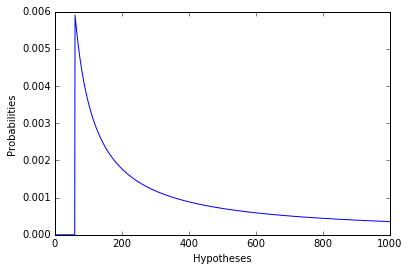

In [34]:
class Locomotive(Bayes):
    '''
    Dice class
    '''

    def Likelihood(self, hypo, data):
        if hypo < data:
            return 0
        else:
            return 1/hypo
#--------END class DIce--------------
    
hypos = [i for i in range(1,1001)]

locomotive = Locomotive(hypos)
#print "Prior probability\n"
#print locomotive

dataL = [60]

locomotive.Update(dataL)
#print "\n\nPosterior probability\n"
#print locomotive

hypos, probs = locomotive.Items()

plt.plot(hypos, probs)
plt.xlabel('Hypotheses')
plt.ylabel('Probabilities')

因为有太多值要展示，我们就用图形表示。从图中可以看出，所有小于60的假设的概率都为0.概率最高的为60.如果我们要猜测最好是猜测60. 但这并不是最好的结果，我们可以算出一个后验分布的期望值，即`对每个假设乘以其出现的概率再求和`。

In [35]:
from __future__ import division, unicode_literals
import logging

class Bayes(object):
    """A bayes class, mainly a dictionary"""
    def __init__(self, hypos=None, name=''):
        """
        Initialize the distribution.
        
        hypos: sequence of hypotheses
        """
        self.name = name
        self.pmf = {}
        if hypos is None:
            return
        
        self.hypos = hypos
        # Initiate the class object
        # Three initalize methods are used to deal with different types of input
        # 
        init_methods = [
            self.InitPmf,
            self.InitMapping,  #A dict
            self.InitSequence, #equal probability for all hypos
            self.InitFailure,
        ]
        
        for method in init_methods:
            try:
                method(hypos)
                break
            except AttributeError:
                continue
        
        if len(self):
            self.Normalize()
    
    def __str__(self):
        '''
        Stringlize self.pmf
        '''
        tmpL = ["Probability table"]
        for hypo, prob in sorted(self.pmf.iteritems()):
            tmpL.append('\t'.join([str(hypo), str(prob)]))
        return '\n'.join(tmpL)
    
    def InitSequence(self, hypos):
        """
        Initialize with a sequence of hypos with equal probabilities.
        
        hypos: ['H1','H2','H3',...]
        """
        for hypo in hypos:
            self.Set(hypo, 1)
    
    def InitMapping(self, hypos):
        """
        Initialize with a map from value to probablity (a dict).
        
        hypos = {'H1':1, 'H2':5, 'H3':4}
        """
        for hypo, prob in hypos.iteritems():
            self.Set(hypo, prob)
    
    def InitPmf(self, hypos):
        """
        Initialize with a Bayes object.
        
        hypos = Bayes()
        """
        for hypo, prob in hypos.iteritems():
            self.Set(hypo, prob)
    
    def InitFailure(self, hypos):
        """Raise an errot"""
        raise ValueError("None of the initialization methods works.")
    
    def __len__(self):
        return len(self.pmf)
    
    def Set(self, hypo, prob=0):
        """
        Set hypo-prob pair
        """
        self.pmf[hypo] = prob
    
    def Print(self):
        """Print the values and freqs in asending order."""
        for hypo, prob in sorted(self.pmf.iteritems()):
            print hypo, prob
    
    def Normalize(self):
        """
        Normalize probability
        """
        total = float(sum(self.pmf.values()))
        if total == 0.0:
            raise ValueError('total probability is zero.')
            logging.warning('Normalize: total probability is zero.')
            return total
        
        factor = 1 / total
        
        for hypo in self.pmf:
            self.pmf[hypo] *= factor
    
    def Items(self):
        '''Return two lists, hypos_list and probability_list'''
        if isinstance(self.hypos, list):
            hypos = self.hypos
        else:
            hypos = self.pmf.keys()
            hypos.sort()
        probs = [self.pmf[hypo] for hypo in hypos]
        return hypos, probs
    
    def Mult(self, hypo, likelihood):
        '''
        Update given hypo probability by given likelihood
        '''
        self.pmf[hypo] = self.pmf.get(hypo,0) * likelihood
    
    def Prob(self, hypo, default=0):
        """
        Get the probability of given hypo.
        """
        return self.pmf.get(hypo, default)
    
    def Update(self,dataL):
        '''
        Update all hypo probability by given obervation.
        
        dataL: A list of observations.
        '''
        for data in dataL:
            for hypo, prob in self.pmf.iteritems():
                self.pmf[hypo] = prob * self.Likelihood(hypo, data)
        self.Normalize()
    
    def Likelihood(self, hypo, data):
        '''
        Re-constructed in child class
        '''
        psss
    
    def Mean(self):
        '''
        Compute the weighted hypothesis using posterior probabilities.
        '''
        total = 0
        for hypo, prob in self.pmf.iteritems():
            total += hypo * prob
        return total

In [36]:
class Locomotive(Bayes):
    '''
    Dice class
    '''

    def Likelihood(self, hypo, data):
        if hypo < data:
            return 0
        else:
            return 1/hypo
#--------END class DIce--------------
    
hypos = [i for i in range(1,1001)]

locomotive = Locomotive(hypos)
#print "Prior probability\n"
#print locomotive

dataL = [60]

locomotive.Update(dataL)

print "Expected locomotive numbers are:", locomotive.Mean()

Expected locomotive numbers are: 333.419893264


这看上去是个很好的猜测，333，如果持续的猜测的话，采用基于后验概率的加权平均值作为估计值，可以最小化均方误差。

下一步我们检测下，选择不同的`N`，对这个加权平均值的影响会有多大？

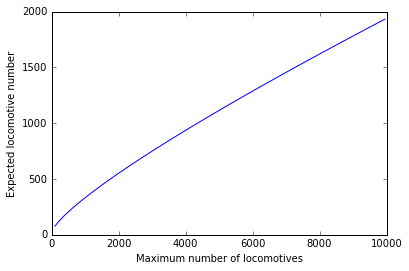

In [42]:
class Locomotive(Bayes):
    '''
    Dice class
    '''

    def Likelihood(self, hypo, data):
        if hypo < data:
            return 0
        else:
            return 1/hypo
#--------END class DIce--------------
    
def testE(N, dataL):
    hypos = [i for i in range(1,N)]
    locomotive = Locomotive(hypos)
    locomotive.Update(dataL)
    return locomotive.Mean()

N = range(100,10000,50)
dataL = [60]
expectN = []

for i in N:
    expectN.append(testE(i, dataL))

plt.plot(N, expectN)
plt.xlabel('Maximum number of locomotives')
plt.ylabel('Expected locomotive number')

这个结果看上去并不好，因为我们的加权期望值与我们最初的假设成正相关，即我们假设这个铁路公司拥有的火车越多，那么我们计算出的这个铁路公司最大期望的火车也越多。

在解决locomotive问题时，我们不得不做一些假设，当然其中一些假设是很武断的。比如说我们认为这个铁路公司拥有的火车数目不会超过1000个。但事实中，有超过1000个火车的铁路公司是可以存在的，每个人会提出不同的假设。而我们这个先验假设对后验平均值的影响又很大。因此我们不得不做进一步的评估。为了得到合理的结果，我们有两条路可走：
    * 获得更多的观察数据，随着观察数据的增多，后验分布有可能收敛。
    * 获得更多的背景信息，提出更好的先验概率模型。

#### 2.1 locomotive problem with more oberved data

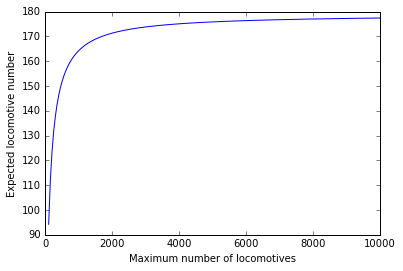

In [41]:
class Locomotive(Bayes):
    '''
    Dice class
    '''

    def Likelihood(self, hypo, data):
        if hypo < data:
            return 0
        else:
            return 1/hypo
#--------END class DIce--------------
    
def testE(N, dataL):
    hypos = [i for i in range(1,N)]
    locomotive = Locomotive(hypos)

    locomotive.Update(dataL)
    return locomotive.Mean()

N = range(100,10001,50)
dataL = [60, 30, 90]
expectN = []

for i in N:
    expectN.append(testE(i, dataL))

plt.plot(N, expectN)
#print zip(N, expectN)
plt.xlabel('Maximum number of locomotives')
plt.ylabel('Expected locomotive number')

从图中可以看出，当我们增加了观察数据后，后验概率的分布趋于收敛。

#### 2.2 locomotive problem with alternative prior

之前我们的先验假设中认为，公司拥有1量火车和拥有1000量火车的概率是相等的。在现实生活中，这可能是不合理的。

我们可以通过查阅质量，收集铁路公司的典型大小。

或者，我们可以做一个更理性的猜测。在很多领域，小公司很多，中等规模的公司较少，超大型公司更少。根据[文献报道](http://www.sciencemag.org/content/293/5536/1818.full.pdf),公司大小的分布遵循幂次定律([Power law](https://en.wikipedia.org/wiki/Power_law)。

"幂次法则"也叫“80-20法则”，由经济学家维尔弗雷多.帕累托在1906年提出，他认为：在任何一组东西中，最重要的只占其中一小部分，约20%，其余80%尽管是多数，却是次要的。幂次法则指的是事物的发展，其规模与次数成反比，规模越大，次数越少。

也就是说，如果有1000个铁路公司拥有少于10辆火车，那么可能有100个公司拥有100辆火车，10个公司拥有1000辆火车，1个公司拥有10,000辆火车。

用数学语言描述，公司的数目与其规模呈负相关。

\begin{equation*}
PMF(x) = \Bigl(\frac{1}{x}\Bigr)^ \alpha
\end{equation*}

PMF(x)是x的概率密度函数，α是参数，通常为1.

那么我们使用新的先验概率分布再次解决下这个问题。

In [51]:
class Locomotive(Bayes):
    '''
    Dice class
    '''

    def Likelihood(self, hypo, data):
        if hypo < data:
            return 0
        else:
            return 1/hypo
#--------END class DIce--------------

N = 500

hypos = [i for i in range(1,N)]    
hypos_prob = [1/i for i in hypos]   
#print hypos_prob
hyposD = dict(zip(hypos,hypos_prob))
    
locomotive = Locomotive(hyposD)
#print locomotive

dataL = [30,60,90]
locomotive.Update(dataL)
print locomotive.Mean()

130.69568746


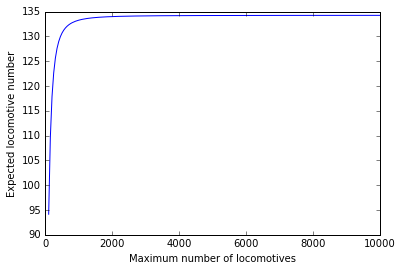

In [53]:
class Locomotive(Bayes):
    '''
    Dice class
    '''

    def Likelihood(self, hypo, data):
        if hypo < data:
            return 0
        else:
            return 1/hypo
#--------END class DIce--------------
    
def testE(N, dataL):
    hypos = [i for i in range(1,N)]    
    hypos_prob = [1/i for i in hypos]    
    hyposD = dict(zip(hypos,hypos_prob))
    
    locomotive = Locomotive(hyposD)

    locomotive.Update(dataL)
    return locomotive.Mean()

N = range(100,10001,50)
#N = [500,1000,2000]

dataL = [30,60,90]
expectN = []

for i in N:
    expectN.append(testE(i, dataL))

plt.plot(N, expectN)
#print zip(N, expectN)
plt.xlabel('Maximum number of locomotives')
plt.ylabel('Expected locomotive number')

从图中可以看出，在`Power law`先验概率下，后验加权平均值收敛于134.

### 3 置信区间

Once you have computed a posterior distribution, it is often useful to summarize the results with a single point estimate or an interval. For point estimates it is common to use the mean, median, or the value with maximum likelihood.

For intervals we usually report two values computed so that there is a 90%
chance that the unknown value falls between them (or any other probability).
These values define a credible interval.

A simple way to compute a credible interval is to add up the probabilities
in the posterior distribution and record the values that correspond to probabilities
5% and 95%. In other words, the 5th and 95th percentiles.

当我们计算出后验概率分布后，通常需要计算出一个点或者一个区间对结果进行估计。如果用一个点估计，通常是加权平均值，种植或者最有最大似然值的假设。

当采用区间时，我们会计算出其上下边界以保证有90%的概率，我们预测的值落在此区间内，这一区间就被定义为置信区间。

一个简单的计算方式是，对假设排序~~后验概率~~排序后，把后验概率相加，计算出加和为5%和95%时的假设，即为区间的边界。

In [58]:
from __future__ import division, unicode_literals
import logging

class Bayes(object):
    """A bayes class, mainly a dictionary"""
    def __init__(self, hypos=None, name=''):
        """
        Initialize the distribution.
        
        hypos: sequence of hypotheses
        """
        self.name = name
        self.pmf = {}
        if hypos is None:
            return
        
        self.hypos = hypos
        # Initiate the class object
        # Three initalize methods are used to deal with different types of input
        # 
        init_methods = [
            self.InitPmf,
            self.InitMapping,  #A dict
            self.InitSequence, #equal probability for all hypos
            self.InitFailure,
        ]
        
        for method in init_methods:
            try:
                method(hypos)
                break
            except AttributeError:
                continue
        
        if len(self):
            self.Normalize()
    
    def __str__(self):
        '''
        Stringlize self.pmf
        '''
        tmpL = ["Probability table"]
        for hypo, prob in sorted(self.pmf.iteritems()):
            tmpL.append('\t'.join([str(hypo), str(prob)]))
        return '\n'.join(tmpL)
    
    def InitSequence(self, hypos):
        """
        Initialize with a sequence of hypos with equal probabilities.
        
        hypos: ['H1','H2','H3',...]
        """
        for hypo in hypos:
            self.Set(hypo, 1)
    
    def InitMapping(self, hypos):
        """
        Initialize with a map from value to probablity (a dict).
        
        hypos = {'H1':1, 'H2':5, 'H3':4}
        """
        for hypo, prob in hypos.iteritems():
            self.Set(hypo, prob)
    
    def InitPmf(self, hypos):
        """
        Initialize with a Bayes object.
        
        hypos = Bayes()
        """
        for hypo, prob in hypos.iteritems():
            self.Set(hypo, prob)
    
    def InitFailure(self, hypos):
        """Raise an errot"""
        raise ValueError("None of the initialization methods works.")
    
    def __len__(self):
        return len(self.pmf)
    
    def Set(self, hypo, prob=0):
        """
        Set hypo-prob pair
        """
        self.pmf[hypo] = prob
    
    def Print(self):
        """Print the values and freqs in asending order."""
        for hypo, prob in sorted(self.pmf.iteritems()):
            print hypo, prob
    
    def Normalize(self):
        """
        Normalize probability
        """
        total = float(sum(self.pmf.values()))
        if total == 0.0:
            raise ValueError('total probability is zero.')
            logging.warning('Normalize: total probability is zero.')
            return total
        
        factor = 1 / total
        
        for hypo in self.pmf:
            self.pmf[hypo] *= factor
    
    def Items(self):
        '''Return two lists, hypos_list and probability_list'''
        if isinstance(self.hypos, list):
            hypos = self.hypos
        else:
            hypos = self.pmf.keys()
            hypos.sort()
        probs = [self.pmf[hypo] for hypo in hypos]
        return hypos, probs
    
    def Mult(self, hypo, likelihood):
        '''
        Update given hypo probability by given likelihood
        '''
        self.pmf[hypo] = self.pmf.get(hypo,0) * likelihood
    
    def Prob(self, hypo, default=0):
        """
        Get the probability of given hypo.
        """
        return self.pmf.get(hypo, default)
    
    def Update(self,dataL):
        '''
        Update all hypo probability by given obervation.
        
        dataL: A list of observations.
        '''
        for data in dataL:
            for hypo, prob in self.pmf.iteritems():
                self.pmf[hypo] = prob * self.Likelihood(hypo, data)
        self.Normalize()
    
    def Likelihood(self, hypo, data):
        '''
        Re-constructed in child class
        '''
        psss
    
    def Mean(self):
        '''
        Compute the weighted hypothesis using posterior probabilities.
        '''
        total = 0
        for hypo, prob in self.pmf.iteritems():
            total += hypo * prob
        return total
    
    def Percentile(self, percentage):
        '''
        Compute a percentile for a given percentage.
        
        percentage: float from 0 to 100.
        ''' 
        if isinstance(self.hypos, list):
            hypos = self.hypos
        else:
            hypos = self.pmf.keys()
            hypos.sort()
        total = 0
        assert 0<=percentage<=100, "percentage must between [0,100]"
        percentile_value = percentage / 100.0
        for hypo in hypos:
            total += self.pmf[hypo]
            if total >= percentile_value:
                return hypo

In [62]:
class Locomotive(Bayes):
    '''
    Dice class
    '''

    def Likelihood(self, hypo, data):
        if hypo < data:
            return 0
        else:
            return 1/hypo
#--------END class DIce--------------
    
def credible_interval(N, dataL):
    hypos = [i for i in range(1,N)]    
    hypos_prob = [1/i for i in hypos]    
    hyposD = dict(zip(hypos,hypos_prob))
    
    locomotive = Locomotive(hyposD)

    locomotive.Update(dataL)
    return locomotive.Percentile(5), locomotive.Percentile(95)

#N = range(100,10001,50)
N = [500,1000,2000]

dataL = [30,60,90]
credible_intervalL = []

for i in N:
    lower_5,upper_95 = credible_interval(i, dataL)
    print "The 90%% credible interval for <%d> is [%d,%d]" % (i,lower_5,upper_95)


The 90% credible interval for <500> is [91,235]
The 90% credible interval for <1000> is [91,242]
The 90% credible interval for <2000> is [91,243]


### 4 累计分布函数

这部分暂时还没用到，故跳过，如果用的多了，再开始写作CDF (Cumulative distribution function).

### 5 关于先验概率

在贝叶斯使用者中关于先验概率的选取有两种途径：
    * 多信息的先验概率： 选择的先验概率依赖于收集到的背景信息，并能最好地反应背景信息。问题是，不同的人使用的背景信息不同，因此这一方法看上去会显得主观。
    * 无信息的先验概率：利用尽量少的背景信息，主要依赖观察数据来计算后验概率。

但通常建议是依赖于最多的背景信息来确定先验概率。因为贝叶斯分析本质上就是基于模型的选择。选择合适的先验概率就是我们在解决问题过程中必须要做的一个决定，但这并不是这一过程中唯一要做的决定，也不会是最主观的决定。因此即使先验概率是客观的，整个分析过程也是主观的。

实际应用中，如果我们有足够多的观察数据，如何选择先验概率对结果的影响不大。但如果我们没有足够多的数据，在确定先验概率时有没有使用背景知识得到的结果差别很大，就如对`locomotive problem`的分析所示。

### 6 练习

对于`locomotive problem`，如果要确定似然函数，我们需要判断，“给定一个铁路公司有N辆火者，我们看到编号为60的火车的概率是多大”。

答案依赖于我们使用的采样方式。在前面的问题解决过程中，我们做出假设“只关注这一家铁路公司的火车编号”。

但如果有很多家铁路公司，各自有着不同数目的火车。假设我们看到任意公司的任意火车的概率相同。这是似然函数会发生变化，我们更容易看到较大的公司的火车。这时我们应该怎么计算呢？

#### 6.1 假设城市内火车数目恒定

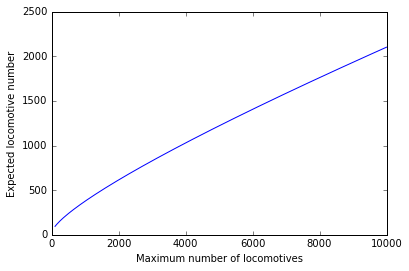

In [65]:
class Locomotive(Bayes):
    '''
    Dice class
    '''
    total_number_trains = 10000
    def Likelihood(self, hypo, data):
        if hypo < data:
            return 0
        else:
            return 1/self.total_number_trains
#--------END class DIce--------------
    
def testE(N, dataL):
    hypos = [i for i in range(1,N)]    
    hypos_prob = [1/i for i in hypos]    
    hyposD = dict(zip(hypos,hypos_prob))
    
    locomotive = Locomotive(hyposD)

    locomotive.Update(dataL)
    return locomotive.Mean()

N = range(100,10001,50)
#N = [500,1000,2000]

dataL = [30,60,90]
expectN = []

for i in N:
    expectN.append(testE(i, dataL))

plt.plot(N, expectN)
#print zip(N, expectN)
plt.xlabel('Maximum number of locomotives')
plt.ylabel('Expected locomotive number')

#### 6.2 StackOverflow上有另外一个解决方式，针对的问题是看到数字为60的火车，而不是看到数字为60的该铁路公司的火车。

http://stats.stackexchange.com/questions/70096/locomotive-problem-with-various-size-companies

### zip的一个用法

In [22]:
a = {1:'a',2:'b',3:'c'}
#a = [1,2,3]
#b = ['a','b','c']
#c = zip(a, b)
#print c
print zip(*a.items())

[(1, 2, 3), (u'a', u'b', u'c')]


In [56]:
a = {11:'a',2:'b',3:'c'}
print a.items()
print sorted(a.items())

[(3, u'c'), (2, u'b'), (11, u'a')]
[(2, u'b'), (3, u'c'), (11, u'a')]
